# Natural product classification from BGCs

Apply the trained model to classify natural products from BGCs, based on [Walkter & Clardy, 2021](https://pubs.acs.org/doi/10.1021/acs.jcim.0c01304).

Briefly, Allison S. Walker and Jon Clardy present an innovative method combining machine learning and bioinformatics to predict the biological activities of natural products from their biosynthetic gene clusters (BGCs). This approach fills a critical gap in current bioinformatics capabilities, enabling the prediction of bioactivities like antibiotic and antifungal properties with up to 80% accuracy. Utilizing a dataset of known BGCs, the authors trained machine learning models, including random forests and support vector machines, to identify specific biosynthetic enzymes and molecular features associated with bioactivity. This method, which showed balanced accuracies between 57% to 80% in various tests, represents a significant advancement in natural product research and holds promise for accelerating the discovery of new antibiotics and therapeutic agents.

## Flatten input directories

In [1]:
from pathlib import Path
from src.helper_functions import flatten_input_directory

antiSMASH_nested_dir = Path("/home/robaina/Documents/NewAtlantis/bioprospecting/data/galapagos/galapagos_antismash_v5")
rgi_nested_dir = Path("/home/robaina/Documents/NewAtlantis/bioprospecting/data/galapagos/galapagos_rgi")
antiMASH_output = Path("/home/robaina/Documents/NewAtlantis/bioprospecting/data/galapagos/antiSMASH_output")
rgi_output = Path("/home/robaina/Documents/NewAtlantis/bioprospecting/data/galapagos/RGI_output")

flatten_input_directory(antiSMASH_nested_dir, antiMASH_output, ".gbk")
flatten_input_directory(rgi_nested_dir, rgi_output, ".txt")

## Run docker

In [1]:
%%bash 

work_dir="/home/robaina/Documents/NewAtlantis/bioprospecting/Natural-product-function"
input_dir="/home/robaina/Documents/NewAtlantis/bioprospecting/data/galapagos"
output_dir="/home/robaina/Documents/NewAtlantis/bioprospecting/data/galapagos/classified_bgcs"

bash src/classify_products.sh \
    -w "$work_dir" \
    -i "$input_dir" \
    -o "$output_dir" >/dev/null

## Example output file

In [7]:
from src.helper_functions import parse_activity_classifier_file

df = parse_activity_classifier_file('data/galapagos/classified_bgcs/SRR12042300__k127_6814.region001.txt')
df

,tree_classifier,logistic_regression_classifier,svm_classifier
antibacterial,0.463150,0.374236,0.231500
anti-gram_positive,0.412750,0.220604,0.196497
anti-gram_negative,0.000000,0.068592,0.071520
antifugnal_antitumor_cytotoxic,0.000000,0.236482,0.219115
antifungal,0.004475,0.161470,0.113403
antitumor_cytotoxic,0.006468,0.123110,0.069044


## Bioactivity results across identified BGCs

In [1]:
from src.helper_functions import compile_natural_product_data

results = compile_natural_product_data(
    'data/galapagos/classified_bgcs',
    'mean',

    classification_cutoff=0.7
    )
results.to_csv('data/galapagos/compiled_natural_product_data.tsv', sep='\t')
results.head()

,antibacterial,anti-gram_positive,anti-gram_negative,antifugnal_antitumor_cytotoxic,antifungal,antitumor_cytotoxic
SRR12042340-5.region001,0,0,0,0,0,0
SRR12042324-39.region001,0,0,0,0,0,0
SRR12042345-6.region001,0,0,0,0,0,0
SRR12042300-7.region001,0,0,0,0,0,0
SRR12042337-20.region001,0,0,0,0,0,0


## Plot results

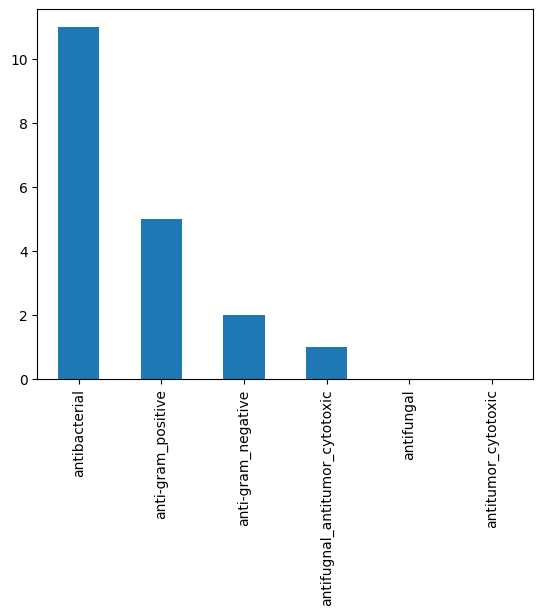

In [2]:
ax = results.sum(axis=0).sort_values(ascending=False).plot.bar()

Representation of predicted biological activities for BGCs derived from marine metagenomic samples of the Galapagos region, using Walker and Clardy's machine learning method. The analysis quantified the occurrences of BGCs predicting high probability (>0.7) of specific bioactivities across three computational models: decision tree, support vector machine, and logistic regression. Categories include antibacterial, anti-Gram-positive, anti-Gram-negative, antifungal, antitumor-cytotoxic, with antibacterial activity showing the highest number of predicted hits.

## List BGCs with activity hits

In [3]:
bioactive_bgcs = results[results.sum(axis=1) > 0]
bioactive_bgcs

,antibacterial,anti-gram_positive,anti-gram_negative,antifugnal_antitumor_cytotoxic,antifungal,antitumor_cytotoxic
SRR12042325-20.region001,1,1,0,0,0,0
SRR12042324-27.region001,1,0,0,0,0,0
SRR12042324-22.region001,1,1,0,0,0,0
SRR12042316-3.region001,0,0,1,0,0,0
SRR12042325-30.region001,1,1,0,0,0,0
SRR12042318-1.region001,0,1,1,0,0,0
SRR12042303-5.region001,1,0,0,0,0,0
SRR12042324-43.region001,0,1,0,0,0,0
SRR12042328-11.region001,1,0,0,0,0,0
SRR12042304-3.region001,1,0,0,0,0,0


In [6]:
from pathlib import Path
from src.helper_functions import parse_metadata, parse_correspondence, assign_metadata_to_bgcs

metadata_file_path = Path('compdiv_plots_emi/data/galapagos/tables/1-bgc_metadata.tsv')
correspondence_file_path = Path('data/galapagos/galapagos_long2short_headers.tsv')

# Parsing the metadata and correspondence
metadata = parse_metadata(metadata_file_path)
correspondence = parse_correspondence(correspondence_file_path)

# Assigning metadata to BGCs
bgcs_metadata = assign_metadata_to_bgcs(bioactive_bgcs.index.to_list(), metadata, correspondence)
bgcs_metadata


,function,taxonomy,novelty,gcf_id,error
new_id,,,,,
SRR12042325-20,terpene,-_cellular organisms;d_Bacteria,1.277633,342.0,NaN
SRR12042324-27,T3PKS,-_cellular organisms;d_Bacteria;-_FCB group;-_...,1.159619,497.0,NaN
SRR12042324-22,hserlactone,-_cellular organisms;d_Bacteria;p_Pseudomonado...,1.243835,769.0,NaN
SRR12042316-3,betalactone,-_cellular organisms;d_Bacteria,1.180791,527.0,NaN
SRR12042325-30,T3PKS,-_cellular organisms;d_Bacteria;-_FCB group;-_...,1.171476,122.0,NaN
SRR12042318-1,betalactone,-_cellular organisms;d_Bacteria,1.180791,527.0,NaN
SRR12042303-5,T3PKS,-_cellular organisms;d_Bacteria;-_FCB group;-_...,1.130316,497.0,NaN
SRR12042324-43,hserlactone,-_cellular organisms,1.218644,742.0,NaN
SRR12042328-11,T3PKS,-_cellular organisms;d_Bacteria;-_FCB group;-_...,1.159619,497.0,NaN
